# Projekt: Chaotisches Pendel simulieren
- Name: Theodor Müller  
- Klasse: 12/3
- Fach: Seminarkurs, Physik am Computer

**https://myphysicslab.com/pendulum/double-pendulum-de.html**

**https://www.youtube.com/watch?v=mAh15ePEW_g&t=339s**


### **Noch zu machen!!!**
- Formel anschauen
- Runge-Kutta vs Eulers Methode
- Chaotisches System und warum an diesem Beispiel zu erkennen

### Chaotische Systeme
- Kleinste Veränderung der Anfangswerte zeigen große Veränderung des Verlaufs -> Nicht wirklich vorhersehbar

## Diagram

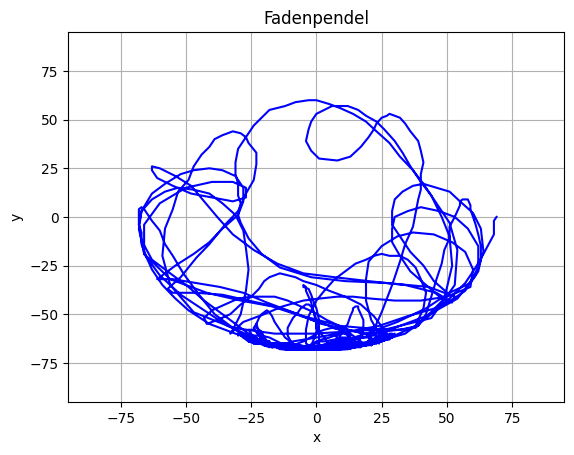

In [7]:
from math import *
import numpy as np
import matplotlib.pyplot as plt


#Funktion zur Berechnung der Endposition des 1.Pendels
def endPosBerechnen(pos, w, L):
    x1, y1 = pos
    x2 = int(x1 + L*sin(w))
    y2 = int(y1 - L*cos(w))
    return (x2, y2)



#Variablen
g = 1                                                       #Gravitation
w1 = pi / 2                                                 #Winkel in radian
w2 = pi / 2                                            
L1 = 50                                                      #Länge
L2 = 20
m1 = 10                                                     #Masse
m2 = 6

lim = (-(L1+L2+25), L1+L2+25)



w1_1 = w1_2 = w2_1 = w2_2 = 0                               #Ableitung des Winkels      =>w1_1 == Geschwindigkeit      =>w1_2 == Beschleunigung

xges = []
yges = []

aPos1 = (0, 0)                               #Anfangsposition 1.Pendel
ePos1 = endPosBerechnen(aPos1, w1, L1)                      #Endposition 1.Pendel berechnen
aPos2 = ePos1                                               #Anfangsposition 2.Pendel == Endposition 1.Pendel (da sie da verbunden sind)
ePos2 = endPosBerechnen(aPos2, w2, L2)                      #Endposition 2.Pendel berechnen

altePos = ePos2                                             #Alte Position speichern um den Weg nachvollziehen zu können

      

for i in range(0,1000):          
    #Formeln für 1. Pendel
    w1_2 = -g*(2*m1+m2)*sin(w1)-m2*g*sin(w1-2*w2)-2*sin(w1-w2)*m2*(w2_1**2*L2+w1_1**2*L1*cos(w1-w2))
    w1_2 = w1_2 / (L1*(2*m1+m2-m2*cos(2*w1-2*w2)))

    #Formeln für 2. Pendel
    w2_2 = 2*sin(w1-w2)*(w1_1**2*L1*(m1+m2)+g*(m1+m2)*cos(w1)+w2_1**2*L2*m2*cos(w1-w2))
    w2_2 = w2_2 / (L2*(2*m1+m2-m2*cos(2*w1-2*w2)))

    #Winkel ändern vom 1. Pendel
    w1_1 += w1_2                                            #Die Beschleunigung(w1_2) verändert die Geschwindigkeit(w1_1)
    w1 += w1_1                                              #Die Geschwindigkeit(w1_1) verändert den Winkel(w1)

    #Winkel ändern vom 2. Pendel    
    w2_1 += w2_2                                            #Die Beschleunigung(w2_2) verändert die Geschwindigkeit(w2_1)
    w2 += w2_1                                              #Die Geschwindigkeit(w2_1) verändert den Winkel(w2)


    #Neue Endposition berechnen
    ePos1 = endPosBerechnen(aPos1, w1, L1)                  #Neue Endposition 1.Pendel berechnen
    aPos2 = ePos1                                           #Neue Anfangsposition 2.Pendel == Neue Endposition 1.Pendel (da sie da verbunden sind)
    ePos2 = endPosBerechnen(aPos2, w2, L2)                  #Neue Endposition 2.Pendel berechnen

    x, y = ePos2
    xges.append(x)
    yges.append(y)


plt.plot(xges,yges, color='blue')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(lim)
plt.ylim(lim)
plt.title("Fadenpendel")
plt.show()


## Animation mit Linie
### **!!!Kann nicht in GitHub ausgeführt werden!!!**
1. Im Terminal  
```bash
pip install pygame
```
2. Code in einer Python-Datei ausführen 

In [ ]:
#=>pip install pygame

#https://myphysicslab.com/pendulum/double-pendulum-de.html
#https://www.youtube.com/watch?v=mAh15ePEW_g&t=339s

#Packete / Bibliothek
import pygame as pg                                         #Zum Animieren
from math import *

#--------------Funktionen-----------------------------------
#Funktion zur Berechnung der Endposition des 1.Pendels
def endPosBerechnen(pos, w, L):
    x1, y1 = pos
    x2 = int(x1 + L*sin(w))
    y2 = int(y1 + L*cos(w))
    return (x2, y2)

#Funktion zum Pendel zeichnen
def draw(p1,p2,m):
    pg.draw.line(screen, (255,255,255), p1, p2, 3)          #Die Pendelstange wird gezeichnet
    pg.draw.circle(screen, (255,0,0), p2, m)                #Die Massekugel wird gezeichnet



#--------------Variablen------------------------------------
breite, hoehe = 1200, 800
w1_1 = w1_2 = w2_1 = w2_2 = 0                               #Ableitung des Winkels      =>w1_1 == Geschwindigkeit      =>w1_2 == Beschleunigung

#Zum Verändern
g = 1                                                       #Gravitation
w1 = pi / 2                                                 #Winkel in radian
w2 = pi / 2                                            
L1 = hoehe // 3                                             #Länge
L2 = hoehe // 3
m1 = 10                                                     #Masse
m2 = 10

#--------------Startposition--------------------------------
aPos1 = (breite//2, hoehe//3)                               #Anfangsposition 1.Pendel
ePos1 = endPosBerechnen(aPos1, w1, L1)                      #Endposition 1.Pendel berechnen
aPos2 = ePos1                                               #Anfangsposition 2.Pendel == Endposition 1.Pendel (da sie da verbunden sind)
ePos2 = endPosBerechnen(aPos2, w2, L2)                      #Endposition 2.Pendel berechnen

altePos = ePos2                                             #Alte Position speichern um den Weg nachvollziehen zu können

#--------------Animation------------------------------------
pg.init()                                                   #pygame Starten / Fenster öffnen
screen = pg.display.set_mode([breite,hoehe])                #Ein Display zum Anzeigen erstellen

screenLinie = pg.Surface([breite,hoehe])                    #Ein weiteren Surface erstellen um die Linie zu speichern

clock = pg.time.Clock()                                     #clock-Variable zum FPS setzen

ablaufen=True       

while ablaufen:     
    clock.tick(60)      
    for event in pg.event.get():                            #Pro Frame wir das ausgeführt
        if event.type == pg.QUIT:                           #Fenster schließen
            ablaufen = False            
    screen.fill((0,0,0))                                    #Bildschirm löschen damit keine Spur des Pendels entsteht
    screen.blit(screenLinie, (0,0))                         #Die Sachen die auf dem Surface sind in das Display "stanzen"


    #Formeln für 1. Pendel
    w1_2 = -g*(2*m1+m2)*sin(w1)-m2*g*sin(w1-2*w2)-2*sin(w1-w2)*m2*(w2_1**2*L2+w1_1**2*L1*cos(w1-w2))
    w1_2 = w1_2 / (L1*(2*m1+m2-m2*cos(2*w1-2*w2)))

    #Formeln für 2. Pendel
    w2_2 = 2*sin(w1-w2)*(w1_1**2*L1*(m1+m2)+g*(m1+m2)*cos(w1)+w2_1**2*L2*m2*cos(w1-w2))
    w2_2 = w2_2 / (L2*(2*m1+m2-m2*cos(2*w1-2*w2)))



    #Winkel ändern vom 1. Pendel
    w1_1 += w1_2                                            #Die Beschleunigung(w1_2) verändert die Geschwindigkeit(w1_1)
    w1 += w1_1                                              #Die Geschwindigkeit(w1_1) verändert den Winkel(w1)

    #Winkel ändern vom 2. Pendel    
    w2_1 += w2_2                                            #Die Beschleunigung(w2_2) verändert die Geschwindigkeit(w2_1)
    w2 += w2_1                                              #Die Geschwindigkeit(w2_1) verändert den Winkel(w2)


    #Neue Endposition berechnen
    ePos1 = endPosBerechnen(aPos1, w1, L1)                  #Neue Endposition 1.Pendel berechnen
    aPos2 = ePos1                                           #Neue Anfangsposition 2.Pendel == Neue Endposition 1.Pendel (da sie da verbunden sind)
    ePos2 = endPosBerechnen(aPos2, w2, L2)                  #Neue Endposition 2.Pendel berechnen


    #Neuen Frame zeichnen
    draw(aPos1,ePos1,m1)                                    #1. Pendel wird im Hintergrund gezeichnet
    draw(aPos2,ePos2,m2)                                    #2. Pendel wird im Hintergrund gezeichnet

    pg.draw.line(screenLinie, (0,255,0), altePos, ePos2, 2) #Die Linie auf dem Surface zeichnen
    altePos = ePos2                                         #Alte Position speichern

    pg.display.flip()                                       #Das Gezeichnete wird auf einen Schlag angezeigt


pg.quit()                                                   #pygame beenden / Fenster schließen

## Animation ohne Linie
### **!!!Kann nicht in GitHub ausgeführt werden!!!**
1. Im Terminal  
```bash
pip install pygame
```
2. Code in einer Python-Datei ausführen 

In [ ]:
#=>pip install pygame

#https://myphysicslab.com/pendulum/double-pendulum-de.html
#https://www.youtube.com/watch?v=mAh15ePEW_g&t=339s

#Packete / Bibliothek
import pygame as pg                                         #Zum Animieren
from math import *

#--------------Funktionen-----------------------------------
#Funktion zur Berechnung der Endposition des 1.Pendels
def endPosBerechnen(pos, w, L):
    x1, y1 = pos
    x2 = int(x1 + L*sin(w))
    y2 = int(y1 + L*cos(w))
    return (x2, y2)

#Funktion zum Pendel zeichnen
def draw(p1,p2,m):
    pg.draw.line(screen, (255,255,255), p1, p2, 3)          #Die Pendelstange wird gezeichnet
    pg.draw.circle(screen, (255,0,0), p2, m)                #Die Massekugel wird gezeichnet



#--------------Variablen------------------------------------
breite, hoehe = 1200, 800
w1_1 = w1_2 = w2_1 = w2_2 = 0                               #Ableitung des Winkels      =>w1_1 == Geschwindigkeit      =>w1_2 == Beschleunigung

#Zum Verändern
g = 1                                                       #Gravitation
w1 = pi / 2                                                 #Winkel in radian
w2 = pi / 2                                            
L1 = hoehe // 3                                             #Länge
L2 = hoehe // 3
m1 = 10                                                     #Masse
m2 = 10

#--------------Startposition--------------------------------
aPos1 = (breite//2, hoehe//3)                               #Anfangsposition 1.Pendel
ePos1 = endPosBerechnen(aPos1, w1, L1)                      #Endposition 1.Pendel berechnen
aPos2 = ePos1                                               #Anfangsposition 2.Pendel == Endposition 1.Pendel (da sie da verbunden sind)
ePos2 = endPosBerechnen(aPos2, w2, L2)                      #Endposition 2.Pendel berechnen

altePos = ePos2                                             #Alte Position speichern um den Weg nachvollziehen zu können

#--------------Animation------------------------------------
pg.init()                                                   #pygame Starten / Fenster öffnen
screen = pg.display.set_mode([breite,hoehe])                #Ein Display zum Anzeigen erstellen

#screenLinie = pg.Surface([breite,hoehe])                    #Ein weiteren Surface erstellen um die Linie zu speichern

clock = pg.time.Clock()                                     #clock-Variable zum FPS setzen

ablaufen=True       

while ablaufen:     
    clock.tick(60)      
    for event in pg.event.get():                            #Pro Frame wir das ausgeführt
        if event.type == pg.QUIT:                           #Fenster schließen
            ablaufen = False            
    screen.fill((0,0,0))                                    #Bildschirm löschen damit keine Spur des Pendels entsteht
    #screen.blit(screenLinie, (0,0))                         #Die Sachen die auf dem Surface sind in das Display "stanzen"


    #Formeln für 1. Pendel
    w1_2 = -g*(2*m1+m2)*sin(w1)-m2*g*sin(w1-2*w2)-2*sin(w1-w2)*m2*(w2_1**2*L2+w1_1**2*L1*cos(w1-w2))
    w1_2 = w1_2 / (L1*(2*m1+m2-m2*cos(2*w1-2*w2)))

    #Formeln für 2. Pendel
    w2_2 = 2*sin(w1-w2)*(w1_1**2*L1*(m1+m2)+g*(m1+m2)*cos(w1)+w2_1**2*L2*m2*cos(w1-w2))
    w2_2 = w2_2 / (L2*(2*m1+m2-m2*cos(2*w1-2*w2)))



    #Winkel ändern vom 1. Pendel
    w1_1 += w1_2                                            #Die Beschleunigung(w1_2) verändert die Geschwindigkeit(w1_1)
    w1 += w1_1                                              #Die Geschwindigkeit(w1_1) verändert den Winkel(w1)

    #Winkel ändern vom 2. Pendel    
    w2_1 += w2_2                                            #Die Beschleunigung(w2_2) verändert die Geschwindigkeit(w2_1)
    w2 += w2_1                                              #Die Geschwindigkeit(w2_1) verändert den Winkel(w2)


    #Neue Endposition berechnen
    ePos1 = endPosBerechnen(aPos1, w1, L1)                  #Neue Endposition 1.Pendel berechnen
    aPos2 = ePos1                                           #Neue Anfangsposition 2.Pendel == Neue Endposition 1.Pendel (da sie da verbunden sind)
    ePos2 = endPosBerechnen(aPos2, w2, L2)                  #Neue Endposition 2.Pendel berechnen


    #Neuen Frame zeichnen
    draw(aPos1,ePos1,m1)                                    #1. Pendel wird im Hintergrund gezeichnet
    draw(aPos2,ePos2,m2)                                    #2. Pendel wird im Hintergrund gezeichnet

    #pg.draw.line(screenLinie, (0,255,0), altePos, ePos2, 2) #Die Linie auf dem Surface zeichnen
    #altePos = ePos2                                         #Alte Position speichern

    pg.display.flip()                                       #Das Gezeichnete wird auf einen Schlag angezeigt


pg.quit()                                                   #pygame beenden / Fenster schließen